<a href="https://colab.research.google.com/github/saikiran-kokkula/Carbon_Emission_Week_1/blob/main/data_exploration.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Shape of the dataset:
available columns and their data types:
Overview of the first 5 rows:
Descriptive statistics:


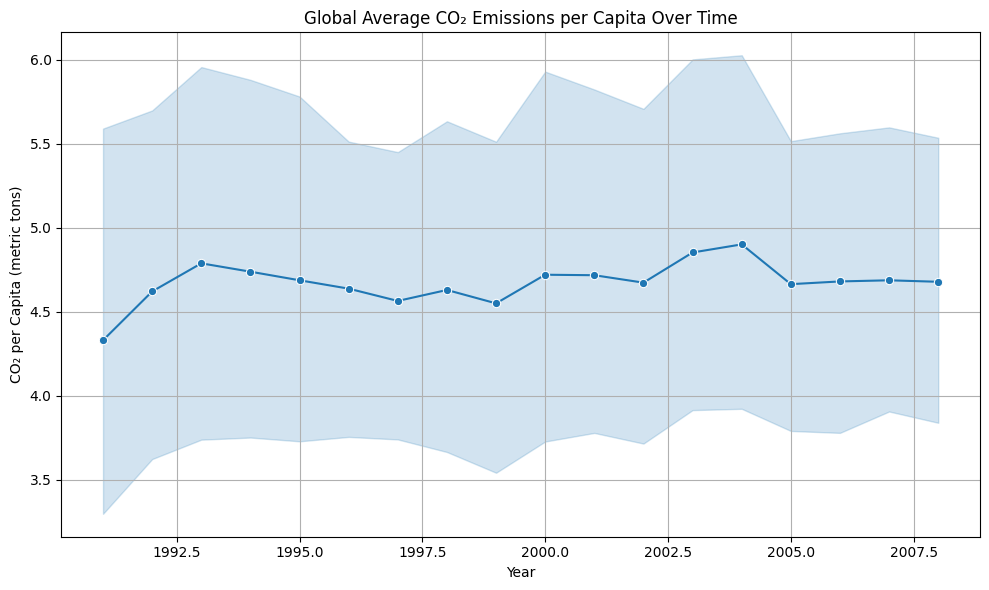

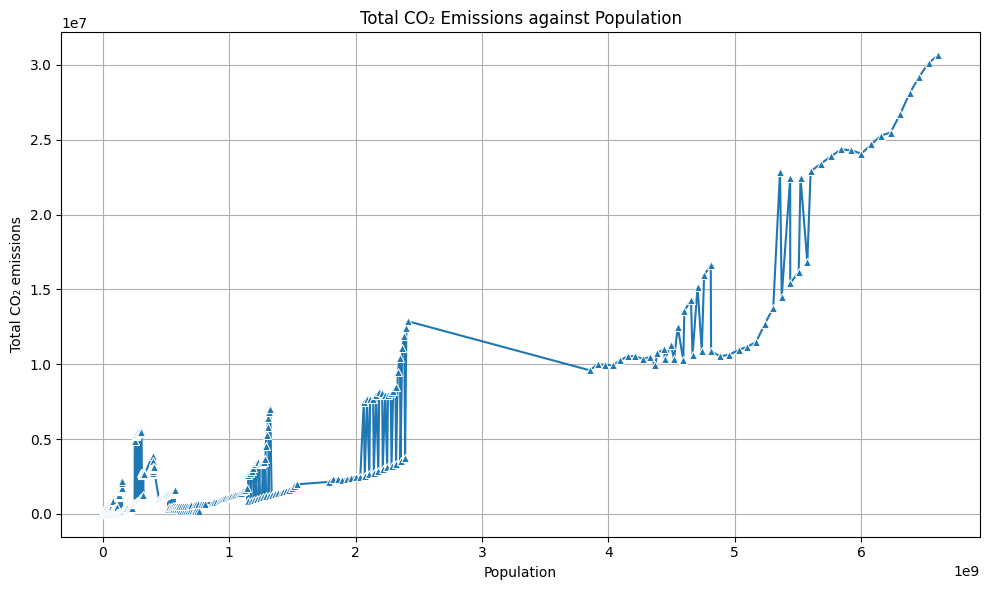

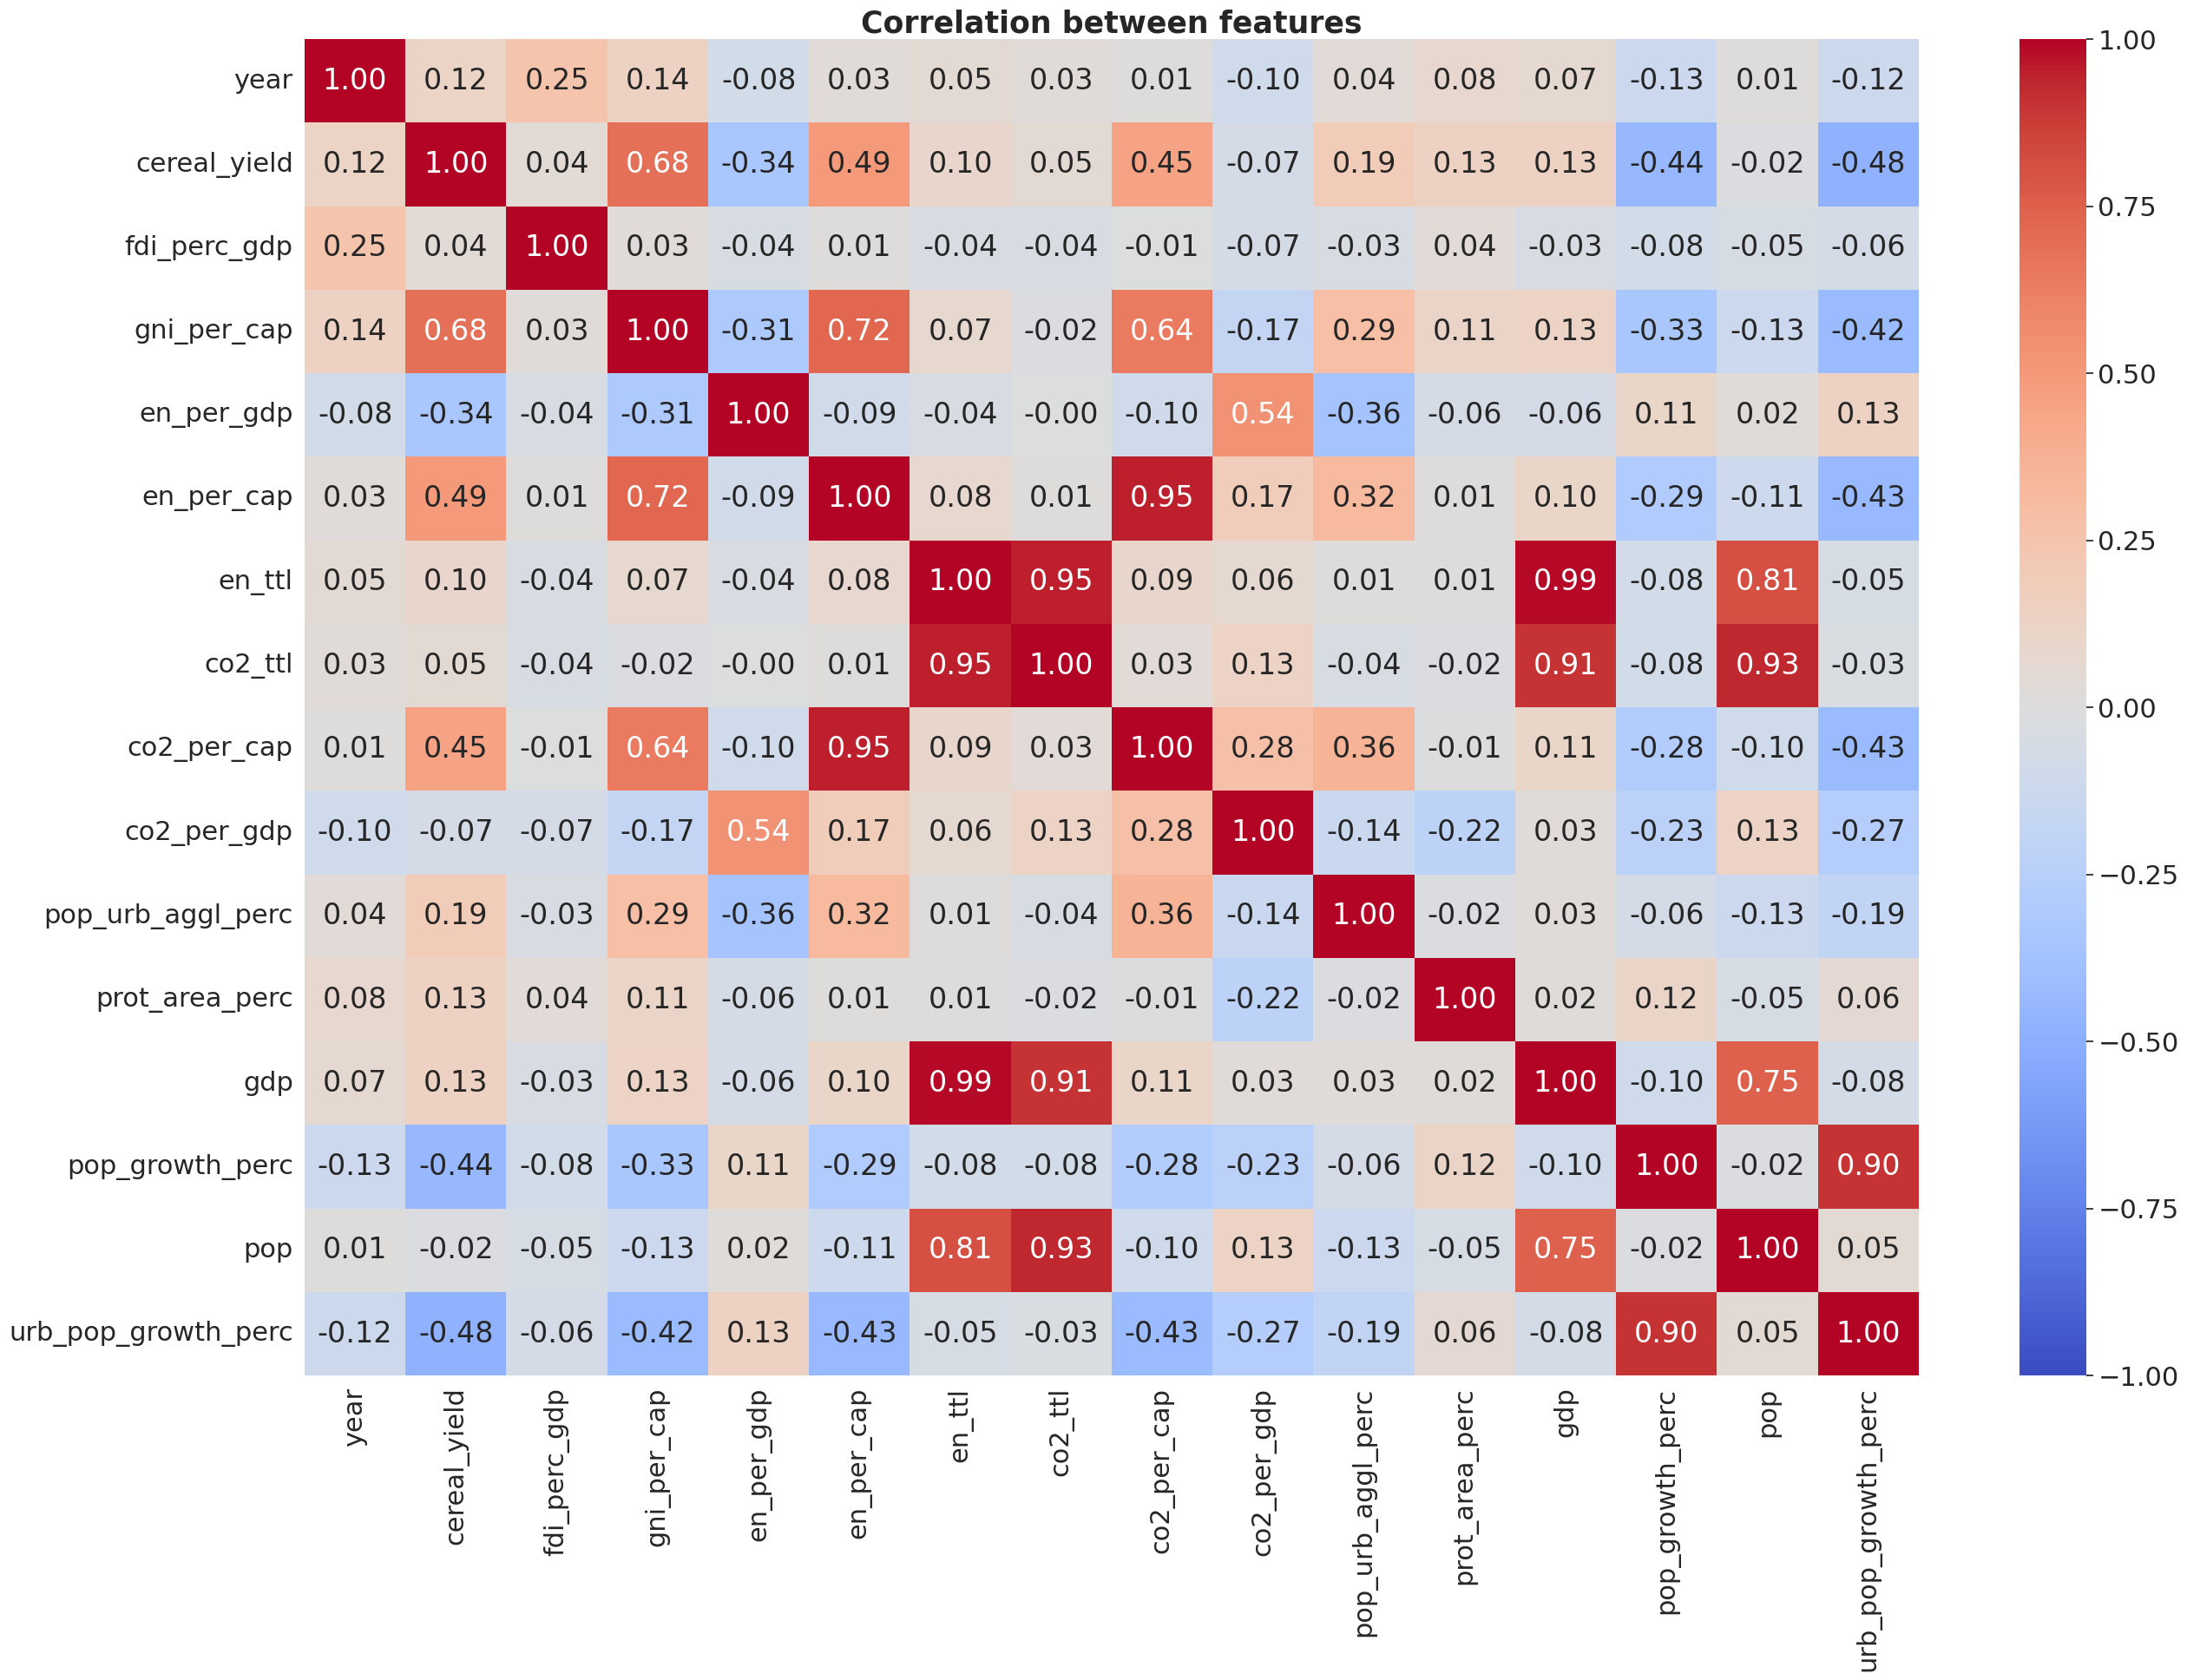

               feature        VIF
0         cereal_yield   1.528133
1         fdi_perc_gdp   0.971334
2          gni_per_cap   2.910812
3           en_per_cap  12.579371
4          co2_per_cap  10.762323
5    pop_urb_aggl_perc   0.979676
6       prot_area_perc   1.022400
7                  gdp   1.106440
8      pop_growth_perc   6.336530
9  urb_pop_growth_perc   5.808288


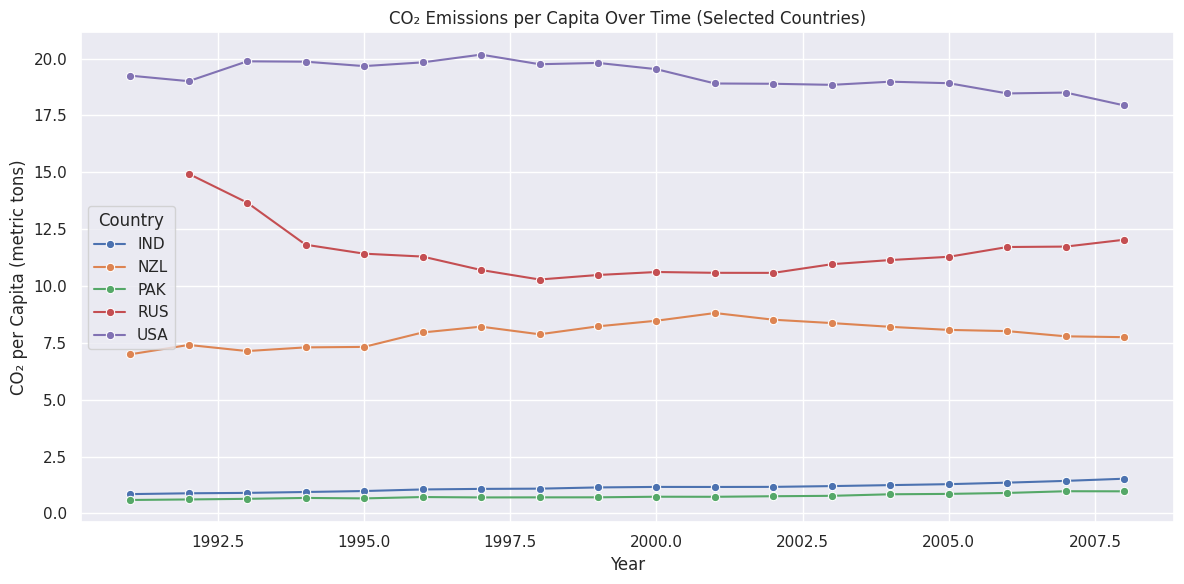

Text(115.34385937499995, 0.5, 'CO2 emissions per capita [t]')

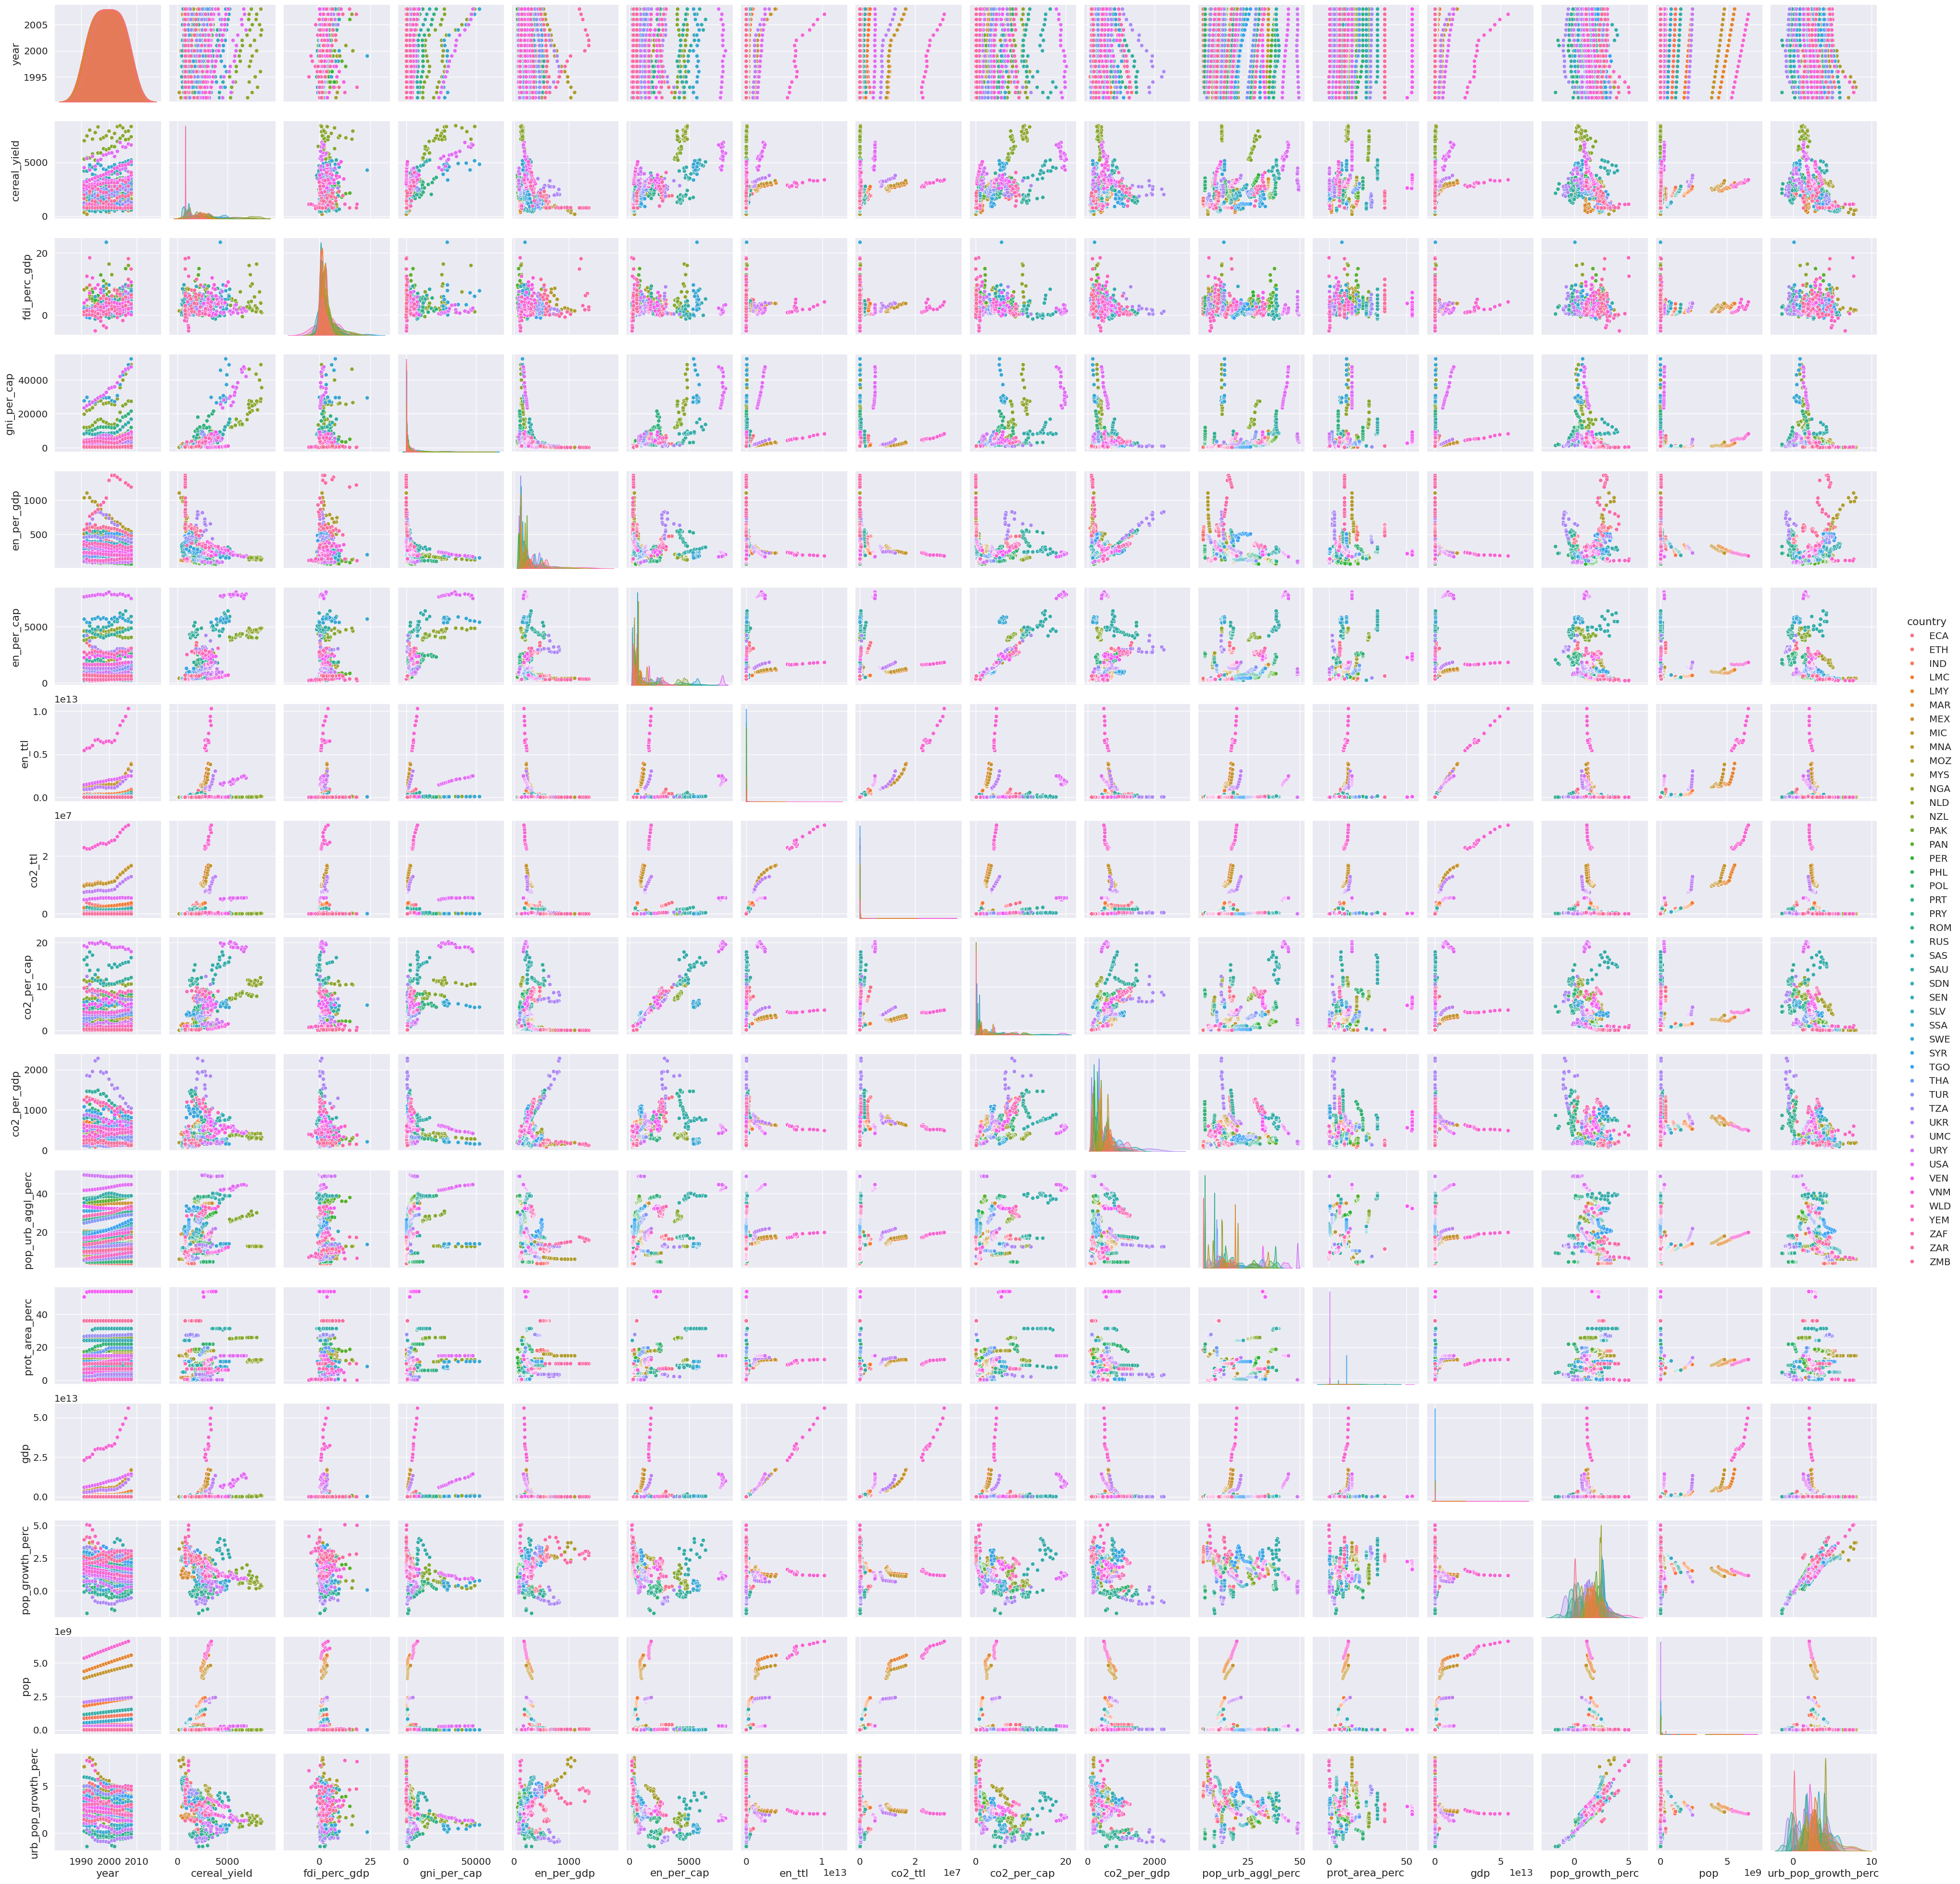

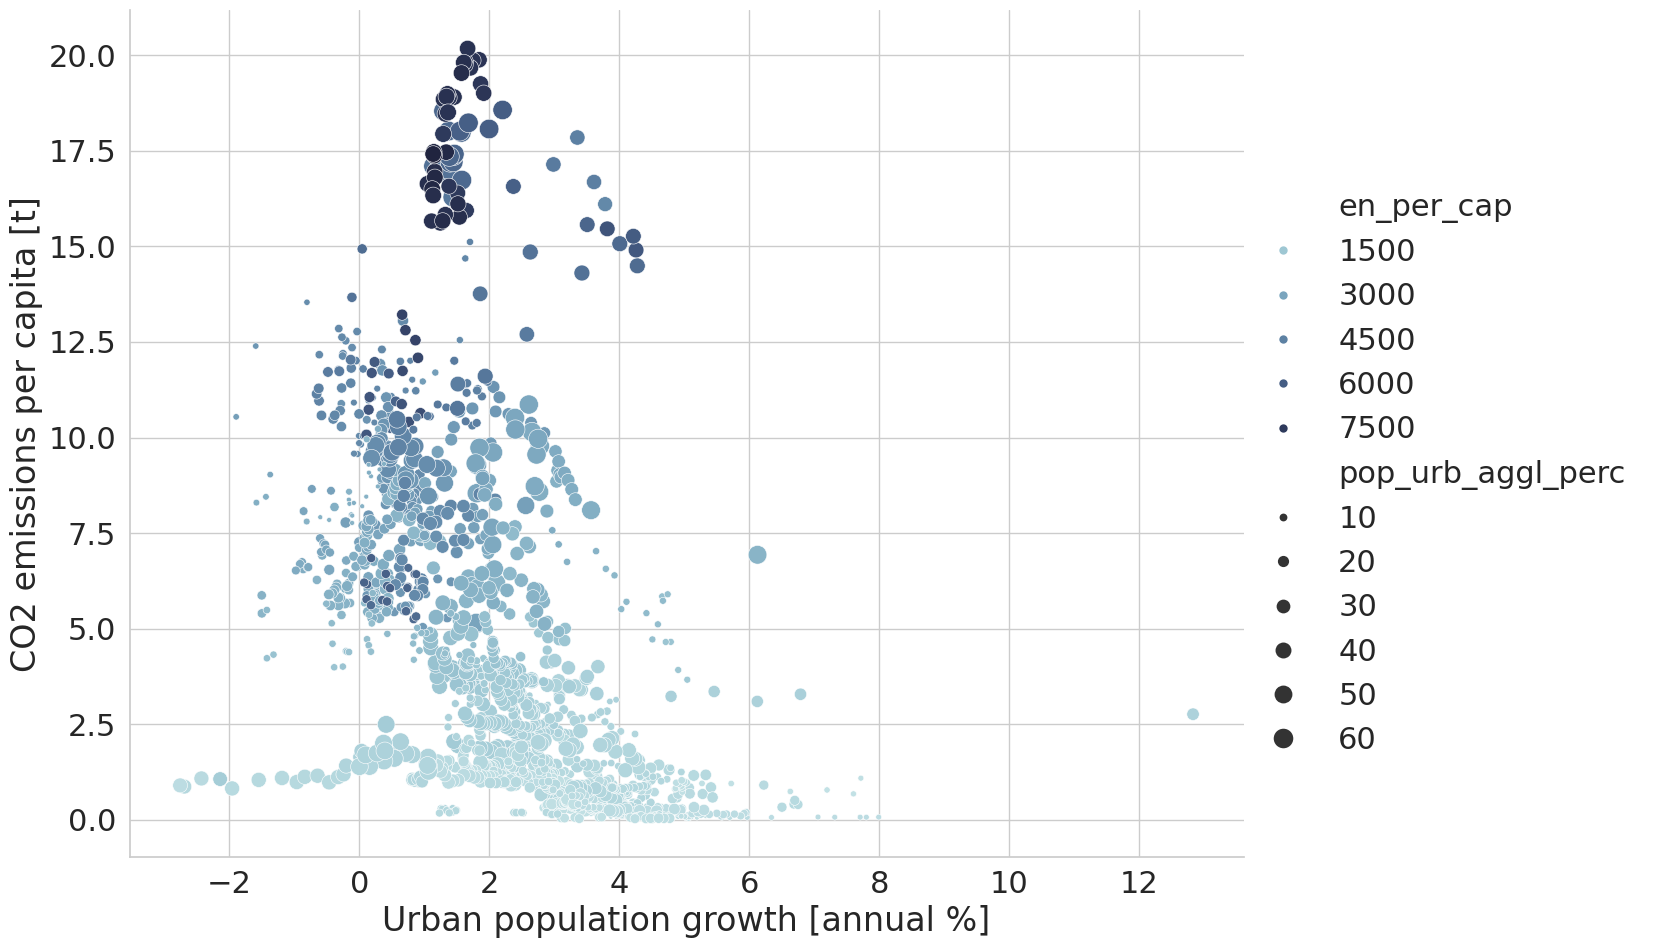

In [1]:
# import all needed libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.stats.outliers_influence import variance_inflation_factor

# import the cleaned dataset from a csv file
data = pd.read_csv(r'data_cleaned.csv')

print("Shape of the dataset:")
data.shape

print("available columns and their data types:")
data.dtypes

print("Overview of the first 5 rows:")
data.head()

print("Descriptive statistics:")
data.describe().T

# Group by Year and calculate mean CO₂ per capita
df_yearly_avg = data.groupby('year')['co2_per_cap'].mean().reset_index()

# Plot
plt.figure(figsize=(10, 6))
sns.lineplot(data=data, x='year', y='co2_per_cap', marker='o')
plt.title('Global Average CO₂ Emissions per Capita Over Time')
plt.ylabel('CO₂ per Capita (metric tons)')
plt.xlabel('Year')
plt.grid(True)
plt.tight_layout()
plt.show()

# Plot Total CO₂ vs Population
plt.figure(figsize=(10, 6))
sns.lineplot(data=data, x='pop', y='co2_ttl', marker='^')
plt.title('Total CO₂ Emissions against Population')
plt.ylabel('Total CO₂ emissions')
plt.xlabel('Population')
plt.grid(True)
plt.tight_layout()
plt.show()

# create a column for the total energy use
data['en_ttl'] = data['en_per_gdp'] * data['gdp'] / 1000

# select all features
features_all = data[['country','year','cereal_yield','fdi_perc_gdp','gni_per_cap',
                     'en_per_gdp', 'en_per_cap', 'en_ttl', 'co2_ttl', 'co2_per_cap',
                     'co2_per_gdp', 'pop_urb_aggl_perc', 'prot_area_perc', 'gdp',
                     'pop_growth_perc', 'pop', 'urb_pop_growth_perc']]

# plot a correlation of all features
sns.set_theme(font_scale=2)
f, ax = plt.subplots(figsize=(30, 20))
sns.heatmap(features_all.drop(['country'], axis=1).corr(), annot=True, cmap='coolwarm', fmt=".2f",
            center=0, vmin=-1, vmax=1)
plt.title('Correlation between features', fontsize=25, weight='bold')
plt.show()
sns.set_theme(font_scale=1)

features_for_vif = data[['cereal_yield','fdi_perc_gdp','gni_per_cap', 'en_per_cap', 'co2_per_cap',
                         'pop_urb_aggl_perc', 'prot_area_perc', 'gdp',  'pop_growth_perc', 'urb_pop_growth_perc']]

vif_data = pd.DataFrame()
vif_data["feature"] = features_for_vif.columns
vif_data["VIF"] = [variance_inflation_factor(features_for_vif.values, i)
                   for i in range(features_for_vif.shape[1])]
print(vif_data)

features = features_all[['cereal_yield','fdi_perc_gdp','gni_per_cap', 'en_per_cap', 'co2_per_cap',
                         'pop_urb_aggl_perc', 'prot_area_perc', 'gdp',  'pop_growth_perc', 'urb_pop_growth_perc']]

# a dictionary with feature labels
labels_dict = {
    'gni_per_cap': 'GNI per capita [Atlas $]',
    'gdp': 'Gross Domestic Product [$]',
    'cereal_yield': 'Cereal yield [kg/ha]',
    'prot_area_perc': 'Nationally terrestrial protected areas [% of total land area]',
    'fdi_perc_gdp': 'Foreign Direct Investment [% of GDP]',
    'pop_urb_aggl_perc': 'Population in urban agglomerations > 1mln [%]',
    'urb_pop_growth_perc': 'Urban population growth [annual %]',
    'pop_growth_perc': 'Population growth [annual %]',
    'co2_per_cap': 'CO2 emissions per capita [t]',
    'en_per_cap': 'Energy use per capita [kg oil eq]'
}

# get unique values in country column
unique_countries = data['country'].unique()

# Select countries to compare
selected_countries = ['IND', 'USA', 'PAK', 'RUS', 'NZL']
df_selected = data[data['country'].isin(selected_countries)]

# Plot CO2 per capita over time
plt.figure(figsize=(12, 6))
sns.lineplot(data=df_selected, x='year', y='co2_per_cap', hue='country', marker='o')
plt.title('CO₂ Emissions per Capita Over Time (Selected Countries)')
plt.ylabel('CO₂ per Capita (metric tons)')
plt.xlabel('Year')
plt.legend(title='Country')
plt.grid(True)
plt.tight_layout()
plt.show()

# Select countries for better visualization
chosen_countries = ['IND', 'LMC', 'LMY', 'MAR', 'MEX', 'MIC', 'MNA', 'MOZ', 'MYS',
'NGA', 'NLD', 'NZL', 'PAK', 'PAN', 'PER', 'PHL', 'PRT', 'PRY',
'ROM', 'SAS', 'SAU', 'SDN', 'SEN', 'SLV', 'SSA', 'SWE', 'SYR',
'TGO', 'THA', 'TUR', 'TZA', 'UMC', 'URY', 'USA', 'VEN', 'VNM',
'WLD', 'ZAF', 'ZAR', 'ZMB', 'ECA', 'POL', 'RUS', 'UKR', 'YEM',
'ETH', 'BEL']

features_chosen = features_all[features_all['country'].isin(chosen_countries)]

sns.set_theme(font_scale=1.3)
sns.pairplot(data=features_chosen, hue='country')

# choose features and label columns
feature_cols = ['country', 'cereal_yield','fdi_perc_gdp','gni_per_cap', 'en_per_cap', 'pop_urb_aggl_perc',
                'prot_area_perc', 'gdp',  'pop_growth_perc', 'urb_pop_growth_perc', 'co2_per_cap']

features_for_plot = data[feature_cols].copy()
features_for_plot = features_for_plot[features_for_plot['country'] != 'ARE']

# 4D plot
sns.set_theme(style="whitegrid", font_scale=2)
cmap = sns.cubehelix_palette(rot=-.2, as_cmap=True)
g = sns.relplot(
    data=features_for_plot,
    x="urb_pop_growth_perc", y="co2_per_cap",
    hue="en_per_cap", size="pop_urb_aggl_perc",
    palette=cmap, sizes=(10, 200),
    height=10, aspect=4/3
)
g.ax.set_xlabel(labels_dict['urb_pop_growth_perc'])
g.ax.set_ylabel(labels_dict['co2_per_cap'])
